<a href="https://colab.research.google.com/github/Reign2121/Mining-project/blob/main/Decision_Tree(ibm_hr_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/WA_Fn-UseC_-HR-Employee-Attrition 2.csv")

#데이터 검사
pd.options.display.max_columns = None
hr.head()

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
hr.shape

(1470, 35)

In [ ]:
hr = hr.astype({'JobLevel': 'category', 'StockOptionLevel': 'category', 'Education':'category',
                'MaritalStatus':'category','Attrition':'category', 'OverTime':'category', 'Gender':'category',
                'BusinessTravel':'category', 'Department':'category','EducationField':'category','JobRole':'category'
                })

In [ ]:
hr.dtypes

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                    category
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

In [ ]:
#변수 제거(모두 같은 값만 가지므로
hr.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)

In [ ]:
#의사결정나무는 정규화 불필요
hr_copy = hr.copy().drop('Attrition',axis=1)

In [ ]:
from sklearn.preprocessing import RobustScaler

#hr_copy = hr.copy().drop("Attrition",axis=1)
num_fea = [column for column in hr_copy.columns if hr_copy[column].dtype != "category"]
cat_fea = [column for column in hr_copy.columns if hr_copy[column].dtype == "category"]

#data_copy[num_fea] = RobustScaler().fit_transform(data_copy[num_fea])

#cat_fea.append('Attrition')

In [ ]:
#원핫인코더로 더미화, get_dummies도 가능

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

dummies = ohe.fit_transform(hr[cat_fea]).toarray()

df_dummies = pd.DataFrame(dummies, columns = ohe.get_feature_names(hr[cat_fea].columns))

hr_dum=pd.concat([hr_copy[num_fea].reset_index(), df_dummies], axis=1)
hr_dum.drop('index',inplace=True,axis=1)

hr_dum.columns

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobLevel_1', 'JobLevel_2',
      

In [ ]:
#더미화( or 원핫 인코더)
#hr_cp = hr.copy()
#x_samp_dum = pd.get_dummies(x_samp[['JobLevel', 'StockOptionLevel', 'Education','MaritalStatus', 'OverTime', 'Gender','BusinessTravel', 'Department','EducationField','JobRole']])
#x_samp = pd.concat([x_samp,x_samp_dum], axis=1)

In [ ]:
#set 분리
x = hr_dum
y = hr.Attrition

In [ ]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
#언더샘플링 (레이블 수 맞추기)
from imblearn.under_sampling import *
#undersample = RandomUnderSampler(sampling_strategy='majority')
#X_samp, y_samp = undersample.fit_resample(x,y)

In [ ]:
#토멕랭크 샘플링
#X_samp, y_samp = TomekLinks().fit_resample(x, y)

In [ ]:
#cnn 샘플링
#X_samp, y_samp = CondensedNearestNeighbour().fit_resample(x, y)

In [ ]:
# oss = 토멕랭크 + cnn <채택>
X_samp, y_samp = OneSidedSelection().fit_resample(x,y)

In [ ]:
y_samp.value_counts()

No     1116
Yes     237
Name: Attrition, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=.2, shuffle = True, stratify = y_samp,random_state = 2)

In [ ]:
#성장제한 / 파라미터 튜닝
max_depth = [4,5,6,7,8,9,10]
for i in max_depth:
  dt_md = DecisionTreeClassifier(min_samples_leaf = 20
                                 , criterion = "entropy",max_depth = i, class_weight= 'balanced',random_state = 2)
  dt_md.fit(x_train,y_train)
  print("max_depth:",i)
  print('정확도:',dt_md.score(x_test,y_test))


max_depth: 4
정확도: 0.7896678966789668
max_depth: 5
정확도: 0.7416974169741697
max_depth: 6
정확도: 0.6826568265682657
max_depth: 7
정확도: 0.7047970479704797
max_depth: 8
정확도: 0.6900369003690037
max_depth: 9
정확도: 0.6900369003690037
max_depth: 10
정확도: 0.7158671586715867


In [ ]:
  #가중치 줬을때
  dt_5 = DecisionTreeClassifier(min_samples_leaf = 20,
                                #말단노드최소수  
                                criterion = "entropy",
                                #엔트로피 지수 사용
                                max_depth = 5,
                                #최대성장 
                                class_weight = 'balanced',
                                #가중치 부여
                                random_state=5)
                                
  dt_5.fit(x_train,y_train)
  print('정확도:',dt_5.score(x_test,y_test))

정확도: 0.7749077490774908


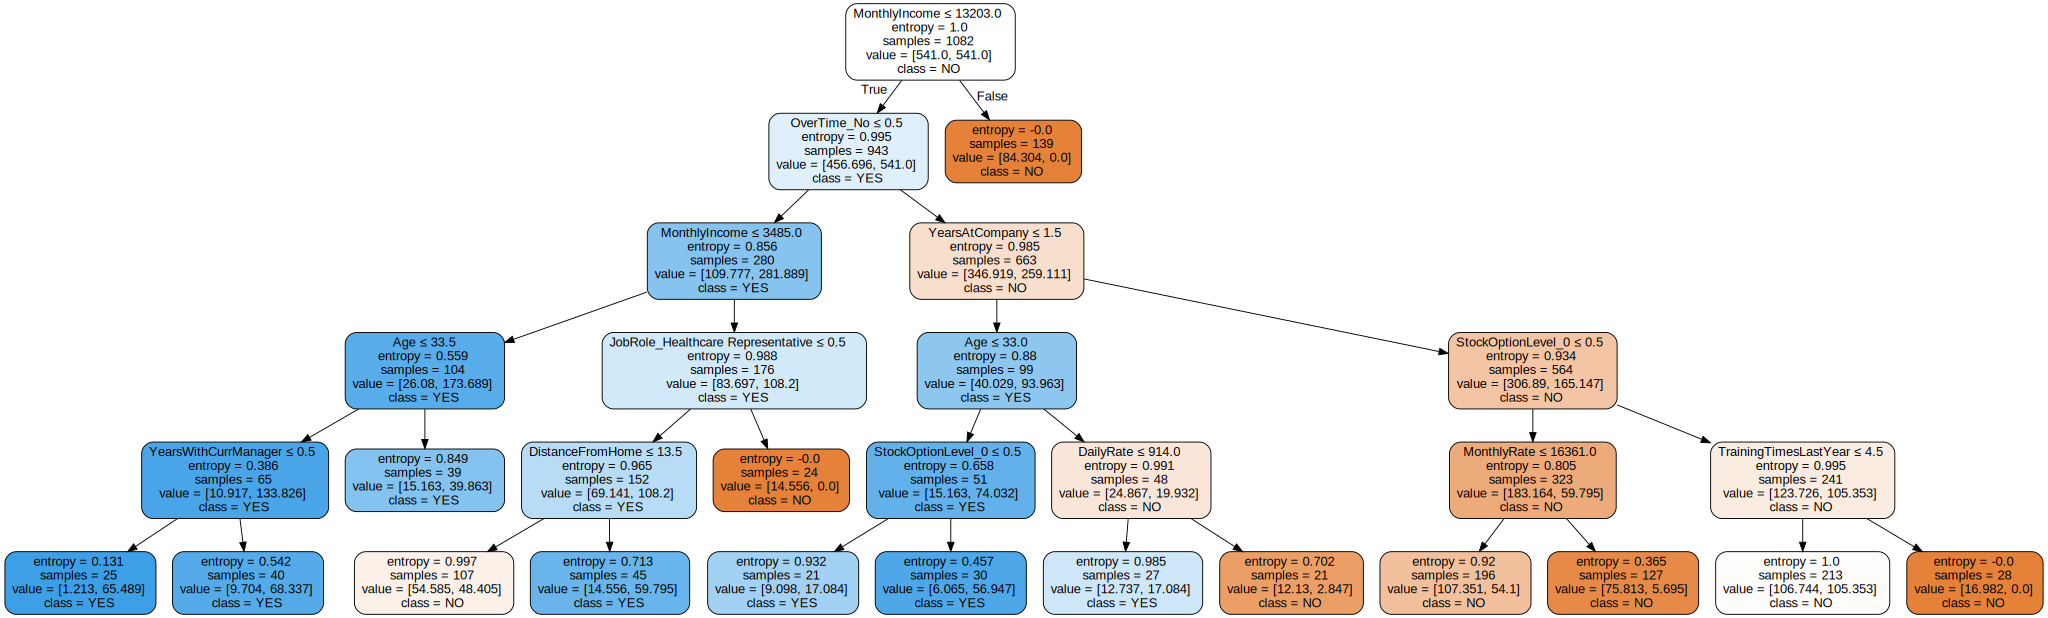

In [ ]:
#시각화
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt_5,   # 의사결정나무 모형 대입                 
                               out_file = None,  # file로 변환할 것인가
                               feature_names = x_test.columns,  # feature 이름
                               class_names = ['NO','YES'],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = graphviz.Source(dot_data)              
graph

In [ ]:
y_predict = dt_5.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)  #confusion matrix 표시


array([[184,  40],
       [ 19,  28]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names = ["F", "T"]))

              precision    recall  f1-score   support

           F       0.91      0.82      0.86       224
           T       0.41      0.60      0.49        47

    accuracy                           0.78       271
   macro avg       0.66      0.71      0.67       271
weighted avg       0.82      0.78      0.80       271



In [ ]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(class_weight='balanced', criterion = "entropy")
rf.fit(x_train,y_train)
rf.score(x_test,y_test) #0.8163265306122449

#rf_cv=cross_val_score(rf,x_test,y_test,cv=10,scoring='accuracy')
#rf_cv

0.8492647058823529